# Aprendizado não supervisionado para identificação de padrões: Clustering Analysis

Na aula de hoje veremos uma ferramenta importantíssima para um(a) Cientista de Dados: Clustering Analysis! Essa família de algoritmos tem como **objetivo primário reconhecer padrões e agrupamentos dentro de seus dados quando você ainda não os conhece**. Um exemplo disso é a segmentação de clientes e personas: como você vai aplicar um aprendizado supervisionado se ainda não sabe quantas ou quais personas consomem de você? A análise de cluster é, então, utilizada como auxiliar para o desenvolvimento de algoritmos de predição ou como algoritmo de descoberta de insights. Antes de partir para a aula de fato, vamos para a dica da aula

## Dica de hoje: 

Bom, como hoje a aula é de clustering, tentei achar alguns bons links de apoio para vocês!
 - __[Esse link](https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68)__ lista 5 dos principais tipos de algoritmos de clustering que um cientista de dados deve saber. É uma ótima leitura para saber com o que trabalhamos no nosso dia-a-dia.
 - __[K-Means vs Mean Shift](http://www.chioka.in/meanshift-algorithm-for-the-rest-of-us-python/)__
 - __[Esse link](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)__ é uma forma interativa de visualizar o DBSCAN funcionando! É sempre bom ver nossos algoritmos funcionando passo-a-passo quando estamos aprendendo sua lógica, recomendo fortemente!

---------------

# DBSCAN

Em 1972, Robert F. Ling publicou um algoritmo intimamente relacionado em "The Theory and Construction of k-Clusters" no The Computer Journal, com uma complexidade estimada de tempo de execução de O (n³). O DBSCAN tem o pior caso de O (n²), e a formulação de consulta de intervalo orientada a banco de dados do DBSCAN permite a aceleração do índice. Os algoritmos diferem ligeiramente na manipulação de pontos de fronteira.

## Principios

Considere um conjunto de pontos em algum espaço a ser agrupado. Seja ε um parâmetro que especifica o raio de uma vizinhança em relação a algum ponto. Para os fins do cluster DBSCAN, os pontos são classificados como pontos principais, pontos alcançáveis ​​(densidade) e valores discrepantes, como segue:

- Um ponto core é um ponto central se pelo menos pontos minPts estiverem a uma distância ε dele (incluindo o ponto core).


- Um ponto border é diretamente acessível a partir de um core se o ponto border estiver dentro da distância ε do ponto central core. Diz-se que os pontos são alcançáveis ​​apenas diretamente dos pontos principais.


- Um ponto border é acessível a partir de um core se houver um caminho core1, ..., coren que leve ao border. Observe que isso implica que todos os pontos no caminho devem ser pontos principais, com a possível exceção do ponto border.


- Todos os pontos inacessíveis a partir de qualquer outro ponto são valores atípicos ou de ruído.


Todo cluster irá possuir pelo menos um ponto core e podem existir pontos border ligados a ele. Essa rede de conexões é que forma o cluster.



<br>
<img src="https://miro.medium.com/max/2000/1*zbm_3K647rvNDmgL6HWUNQ.png" align="center" width="100%">
<br>

Neste diagrama, minPts = 4. Os pontos em vermelho são pontos centrais, porque a área em torno desses pontos em um raio ε contém pelo menos 4 pontos (incluindo o próprio ponto). Como todos são acessíveis um do outro, eles formam um único cluster. Os pontos B e C não são pontos principais, mas são acessíveis a partir de A (por meio de outros pontos principais) e, portanto, também pertencem ao cluster. O ponto N é um ponto de ruído que não é um ponto central nem é alcançável diretamente.

A acessibilidade não é uma relação simétrica, pois, por definição, nenhum ponto pode ser alcançável a partir de um ponto não central, independentemente da distância (portanto, um ponto não central pode ser alcançável, mas nada pode ser alcançado a partir dele). Portanto, é necessária uma noção adicional de conexão para definir formalmente a extensão dos clusters encontrados pelo DBSCAN. Dois pontos peq são conectados à densidade se houver um ponto o tal que ambos peq sejam alcançáveis a partir de o. A conexão de densidade é simétrica.

Um cluster então deve satisfazer duas propriedades:

1. Todos os pontos dentro do cluster são mutuamente conectados por densidade.


2. Se um ponto é alcançável por densidade a partir de qualquer ponto do cluster, ele também faz parte do cluster.

## DB_SCAN - Clustering by Density

Até agora vimos algoritmos de clustering com base em centroides. Embora úteis, eles podem cair em armadilhas comuns de acordo com a forma dos dados (por exemplo, deixar um outlier influenciar sua média e calcular centroides errados). Há uma outro tipo de algoritmos de clustering que se baseiam no conceito de densidade! Eles observam os arredores dos dados e tomam decisões a partir disso. A premissa deles é forte, pois é de se pensar que dados semelhantes estão próximos uns dos outros, independente de sua forma. <br>
O mais famoso algoritmo de clustering por densidade é o DBSCAN (Density-Based Spatial Clustering of Applications with Noise). O DBSCAN possui 2 parâmetros:

 - `eps` ou ɛ (epsilon): o raio da vizinhança
 - `minPts`: o número mínimo de datapoints de uma vizinhança para que ela seja considera um cluster. <br>
 
Para escolher bons parâmetros, primeiro precisamos entender como eles são usados e como eles afetam o resultado final.

`eps`: Se o valor de eps escolhido for muito pequeno, uma grande parte do conjunto de dados (nuvem de dados) não será "capturada" pelo método. Esses pontos não clusterizados são definidos como outliers após o término da execução do algoritmo, pois a região na qual está inserido não atende aos critérios mínimos que definem uma região densa. Por outro lado, se o valor escolhido for muito alto, os clusters encontrados ficarão sobrepostos e, na verdade, todos os pontos da nuvem de dados pertencerão a um único cluster. O valor do eps deveria ser escolhido baseado nas distâncias dos pontos no dataset. Esse estudo pode ser feito com um gráfico de vizinhos, que vamos ver jájá. No geral, valores menores para o eps sãpo preferidos.

`minPoints`: Uma regra geral é que o minPoints pode ser derivado do número de dimensões no dataset. Nessa regra, o minPoints deve ser minPoints ≥ D + 1, onde D é o número de dimensões dos dados. De qualquer forma, valores maiores usualmente são preferidos. Um número mínimo de minPoints é 3, mas para datasets muito grandes, maior a necessidade de aumentarmos o número de minPoints.


Dessa forma, temos 3 tipos de ponots a partir desse algoritmo:
 - Core points: os pontos que estão diretamente influenciando na densidade de nossa vizinhança
 - Border Points: os pontos que são alcançaveis por vizinhanças de vizinhanças
 - Outliers: pontos fora de qualquer vizinhança
 
Os passos do DBSCAN são os seguintes:
 - Escolha um ponto que ainda não foi dito como outlier ou assimilado a um cluster. Calcule sua vizinhança e determine se é um Core Point. Se sim, inicie uma nova vizinhança a partir dele.
 - Adicione todos os directly-reachable points desse novo cluster ao seu cluster.
 - Repita esses 2 passos até todos os clusters serem encontrados
 - Identifique os outliers
 




Para visualizar a página do *DBScan Simulator* acesse __[Visualizing DBScan Clustering](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)__

Seguindo passo a passo o processo mencionado anteriormente, o DBSCAN começará dividindo os dados em n dimensões. Depois que o DBSCAN tiver feito isso, ele começará em um ponto aleatório (neste caso, vamos supor que seja um dos pontos vermelhos) e contará quantos outros pontos estão próximos. O DBSCAN continuará este processo até que nenhum outro ponto de dados esteja próximo e, então, procurará formar um segundo cluster.
Como você deve ter notado no gráfico, há alguns parâmetros e especificações que precisamos fornecer ao DBSCAN antes que ele faça seu trabalho. Os dois parâmetros que precisamos especificar são:
Qual é o número mínimo de pontos de dados necessários para determinar um único cluster?
A que distância um ponto pode estar do próximo ponto dentro do mesmo aglomerado?

# Métricas de performance
- Silhouette Score: O score de silhueta é calculada utilizando a distância média intragrupo entre os pontos E a distância média do grupo mais próximo. Por exemplo, um cluster com muitos pontos de dados muito próximos uns dos outros (alta densidade) que está longe do próximo cluster mais próximo (sugerindo que o cluster é muito único em comparação com o próximo mais próximo), terá um score de silhueta forte . Esse score, como já vimos em aulas anteriores, varia de -1 a 1, sendo -1 a pior pontuação possível e 1 sendo a melhor pontuação. Scores de silhueta de 0 sugerem clusters sobrepostos. 



- Inertia/WCSS/WSS: a inércia mede a soma dos quadrados do cluster interno (a soma dos quadrados é a soma de todos os resíduos). A inércia é utilizada para medir como os clusters estão relacionados entre si; quanto menor a pontuação de inércia, melhor. NO ENTANTO, é importante notar que a inércia depende fortemente da suposição de que os aglomerados são convexos (de forma esférica). O DBSCAN não divide necessariamente os dados em clusters esféricos, portanto, a inércia não é uma boa métrica a ser usada para avaliar os modelos DBSCAN. A inércia é mais frequentemente usada em outros métodos de agrupamento, como agrupamento K-means.

# KMeans vs DBSCAN

| K-Means | DBSCAN |
| --- | --- | 
| Clusters formados são mais ou menos esféricos ou convexos em forma e do mesmo tamanho| Clusters formados são arbitrários em formato e podem não ter o mesmo tamanho |
| K-means é sensível ao número de clusters definido pelo usuário| Não é necessário definir previamente o número de clusters |
| K-means é mais eficiente para datasets maiores é sensível ao número de clusters definido pelo usuário| DBSCAN pode sofrer um pouco com alta dimensionalidade |
| K-means sofre com outliers e os clusters formados podem ser distorcidos| DBSCAN lida com outliers e os identifica no processo de clusterização|
|Exige a definição de 1 parâmetro (K) | Exige a definição de dois parâmetros (eps e minPoints)|
|Clusteriza bem agrupamentos de densidade variável | Sofre um pouquinho quando os clusters são muito esparsos ou  de densidade muito variável|

# Exemplo Prático

Vamos primeiro criar um conjunto de dados que pode replicar um conjunto adequado de pontos de dados para nossa análise. Python é muito generoso com seu conjunto de bibliotecas. Para fins de geração de dados, usaremos a função make blobs da biblioteca sci-kit learn


Aqui, criei 3 blobs de dados. Podemos ver a visualização desses blobs de dados conforme ilustrado na Figura 1. Para este exemplo, criei intencionalmente 3 clusters com densidades diferentes para dificultar o clustering.

## Ajuste dos Hiperparâmetros

DBSCAN tem alguns parâmetros e, deles, dois são cruciais. O primeiro é o parâmetro eps e o outro é min_points (min_samples). Este último se refere ao número de pontos vizinhos necessários para que um ponto seja considerado uma região densa ou um cluster válido. Normalmente, definimos isso com um valor que faz sentido para o conjunto de dados e o número de dimensões presentes nos dados. Isso determinará o número de outliers identificados. No entanto, esse parâmetro não é tão importante quanto o eps.
Vamos rodar o DBSCAN com alguns valores estimados para nosso conjunto de dados.

Teoria: O eps está grande!

## Tunando eps

1.0
0.5
0.3333333333333333
0.25
0.2
0.16666666666666666
0.14285714285714285
0.125
0.1111111111111111
0.1


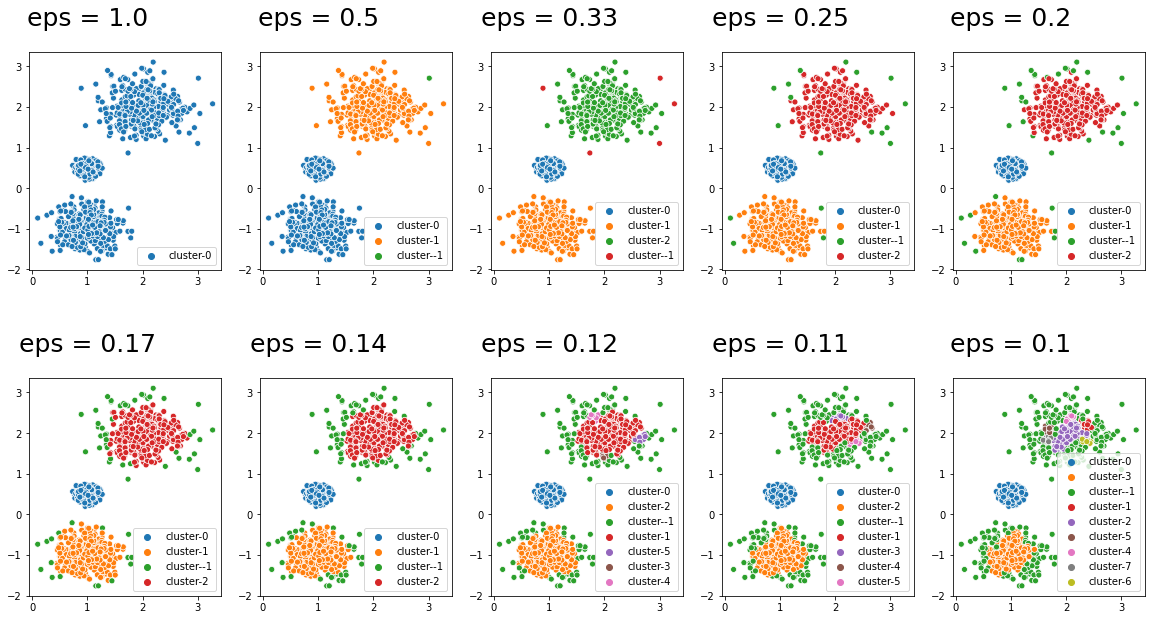

In [75]:
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=.5, wspace=.2)
i = 1
for x in range(10, 0, -1):
    eps = 1/(11-x)
    db = DBSCAN(eps=eps, min_samples=10).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    
    print(eps)
    ax = fig.add_subplot(2, 5, i)
    ax.text(1, 4, "eps = {}".format(round(eps, 2)), fontsize=25, ha="center")
    sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in labels])
    
    i += 1

Mas e quando a visualização 2D e 3D não é possível ou suficientemente boa para que possamos ajustar no olho?

## Método Sistemático para tunar eps

Como o número de eps é proporcional ao número esperado de vizinhos descobertos, podemos usar os vizinhos mais próximos para chegar a uma estimativa justa para eps. Vamos calcular os 3 vizinhos mais próximos de cada ponto e medir a distância para estimar o eps.

Esse método `kneighbors` retorna para nós as distâncias para k vizinhos e os índices indicam quais os pontos do conjunto de dados aos quais as distâncias devolvidas correspondem.

Vamos ordenar o array das distâncias utilizando o vizinho mais distante.

Observe que no cálculo do vizinho mais próximo, o próprio ponto aparecerá como o primeiro vizinho mais próximo. Procuramos então os 11 vizinhos mais próximos. Buscamos a distância na coluna 10, pois ela será a distância pro vizinho mais distante, o décimo vizinho mais próximo. Como podemos ver, temos um ponto do cotovelo 

Para sermos mais certeiros em localizar o cotovelo, vamos usar a biblioteca KneeLocator.

Limitações
Existem algumas suposições implícitas nesse método:
- As densidades dos clusters são parecidas
- O tamanho dos clusters ou sua sparsidade são parecidas